# Experiment 02  -  RC Transients

Date:

Name:

Partner's name:

## Place a heading here to indicate what you are working on

Enter notes here as you work through the experiment. Begin with a brief statement about what you will be working on, and why. 

## You might need another heading here

As you progress through the lab, keep adding notes, and include headings to help keep things organized. You can also include calculatino blocks to determine parameters along the way. We will provide much less structure in this notebook, so it is up to you to take notes as you go along. We will be checking your work during the lab.

## Measurements of Resistance and Capacitance

Record the measured values of R and C for the components that you are using in your circuit. To estimate the uncertainties in these values, you will need to consult the manual for your DMM. Use a code cell to input the values and calculate $\tau$ as well as propagate the uncertainties.

## Upload Data Files to Your Jupyter Account and Pack the Data

Below, we have provided a more compact version of the code you used last week to examine your data and then do some averaging to pack it. Once you have saved a set of data from the oscilloscope, and uploaded it to your Jupyter account, the entire code runs in one cell. You will probably need to run it several times until you are satisfied with the final output. 

The key pieces of code that you will need to alter are indicated by notes in Red, and include:
- the name for your uploaded raw data file
- the zoomed in flat range you use to examine the noise and measure the standard deviation
- the number of points you want to average when packing the data
- a new index range that you can use to trim unwanted data at the start or end of the time range
- the filename you will use to save your packed and trimmed data 

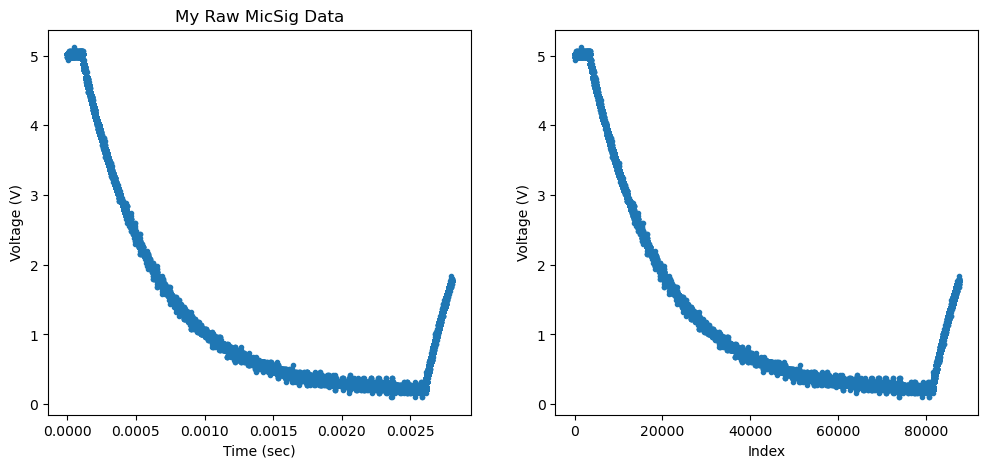

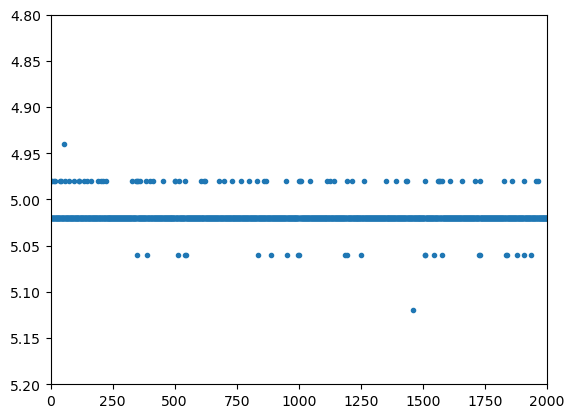

mean =  5.0190699999999975
standard deviation =  0.009128806055558287


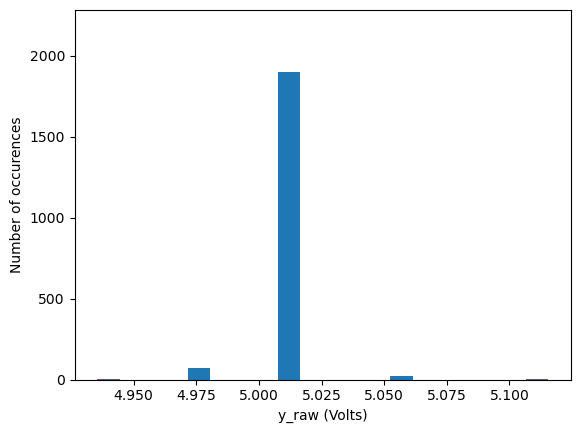

packing is done by averaging 100 data points
packed data contains full data set


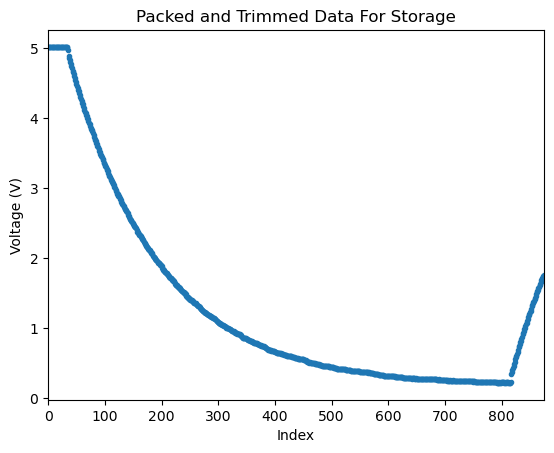

Packed Data Stored in  RCdecayVC2_packed.csv


In [18]:
# import the  necessary libraries and rename them
import numpy as np
import array
import pandas as pd
import matplotlib.pyplot as plt

###############################################################################
# LIST OF ALL INPUTS
###############################################################################

fname = 'RCdecayVC2.csv' # file name containing your raw data

# choose the data range you want to examine
indexraw_min = 0
indexraw_max = 2000

# set y-scale to correspond to this range
yregion_min=5.2
yregion_max=4.8

npac=100 # define packing factor  npac

# trim data set range before output to .csv file
trim = 0 # default is 0 to save full dataset, set trim to 1 to trim the output data then give the range
trim_min=60 # start of trimmed data by packed index
trim_max=800 # end of trimmed data by packed index

title='My Packed MicSig Data' # give your graph a title
output_name = 'RCdecayVC2_packed.csv' # provide an output filename for the packed data


# read in data - the file is assumed to be in csv format (comma separated variables). 
#Files need to be specified with a full path OR they have to be saved in the same folder 
#as the script
data = np.loadtxt(fname, delimiter=',', comments='#',usecols=(3,4),skiprows=1)
#data = np.loadtxt(fname, delimiter=',',comments='#' )
# access the data columns and assign variables xraw and yraw
#generate  an array  xraw  which is the first  column  of  data.  Note the first column is 
#indexed as  zero.
xraw = data[:,0]
#generate  an array  yraw  which is the second  column  of  data  (index  1)
yraw = data[:,1]
#generate array containing index
indexraw=np.arange(len(xraw))

# plot data versus time and data versus index
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
ax1.scatter(xraw, yraw,marker='.')
ax1.set_xlabel('Time (sec)')
ax1.set_ylabel('Voltage (V)')
ax1.set_title('My Raw MicSig Data')
ax2 = fig.add_subplot(122)
ax2.scatter(indexraw,yraw,marker='.')
ax2.set_xlabel('Index')
ax2.set_ylabel('Voltage (V)')
plt.show()

###############################################################################
# PLOT RESTRICTED INDEX RANGE OF FLAT DATA, CALCULATE UNCERTAINTY
# plots a restricted index range where the data is flat
# and calculates the standard deviation to assess the noise
###############################################################################

# change axis limits
plt.xlim(indexraw_min,indexraw_max)
plt.ylim(yregion_min,yregion_max)

# plot the data versus index
plt.scatter(indexraw,yraw,marker='.')

# This next command displays the index plot. 
plt.show()

#calculate and display the mean and standard deviation of the data that you have zoomed in on.
y_ave = np.mean(yraw[indexraw_min:indexraw_max])
y_std = np.std(yraw[indexraw_min:indexraw_max])
print('mean = ',y_ave)
print('standard deviation = ', y_std)

# display a histogram of the data
hist,bins = np.histogram(yraw[indexraw_min:indexraw_max],bins=20)
plt.bar(bins[:-1],hist,width=bins[1]-bins[0])
plt.ylim(0,1.2*np.max(hist))
plt.xlabel('y_raw (Volts)')
plt.ylabel('Number of occurences')
plt.show()

###############################################################################
# PACK AND TRIM DATA
###############################################################################

#define packing factor  npac
npac=100

#define a function  to pack the data
def pack(A,p):
  # A is an array, and p is the packing factor
  B = np.zeros(len(A)//p)
  i = 1
  while i-1<len(B):
    B[i-1] = np.mean(A[p*(i-1):p*i])
    i += 1
  return B
# pack the data
x=pack(xraw,npac)
y=pack(yraw,npac)

#create a vector that also has the integer index (index = 0,1,2 ... length-1)
length=len(x)
#print(length)
index = np.arange(length)

#create a vector that contains fixed uncertainty for x values (in this case set to zero
sigmax = [0]*length
#print(sigmax)

#Create a vector that contains uncertainty of averaged y values. 
#sigmayraw is your estimate of the uncertainty in individual raw data points

#Here it is taking that value from your previous statistics code 
#If you think the standard deviation of your data is an underestimate of the uncertainty,
#you can also enter a value by hand - just change the line that defines simayraw
sigmayraw = y_std

#sigmaymean is the uncertainty of y after averaging npac points together
#sigmay is an array of uncertainties, all of the same value as sigmaymean
sigmaymean = sigmayraw/np.sqrt(npac)
sigmay = [sigmaymean]*length

print('packing is done by averaging', npac, 'data points')

if trim == 1:
    index_min=trim_min
    index_max=trim_max
    print('packed data has been trimmed from ', index_min, 'to ', index_max)
else:
    index_min=0
    index_max=length
    print('packed data contains full data set')

# plot the trimmed data versus index
plt.errorbar(index,y,yerr=sigmay,marker='.',linestyle='')
## marker='o' : use markers to indicate each data point (x_1,y_1),(x_2,y_2)
## linestyle= '' : no line is drawn to connect the data points
## linestyle= '-' : a line is drawn to connect the data points

# change axis limits
plt.xlim(index_min,index_max)

# add axis labels
plt.title('Packed and Trimmed Data For Storage')
plt.xlabel('Index')
plt.ylabel('Voltage (V)')
plt.show()

# Create Array and output as CSV file in four-column format with two-row headers

header = [np.array(['time','u[time]','Voltage','u[Voltage]']), 
np.array(['(sec)','(sec)','(V)','(V)'])]
d1 = [x[index_min:index_max] , sigmax[index_min:index_max] , y[index_min:index_max] , sigmay[index_min:index_max]]
d1_a = np.array(d1)
df = pd.DataFrame(np.transpose(d1_a), columns=header )   
    
# print(df)


###############################################################################
# SAVE DATA TO FILE
###############################################################################

csv_data = df.to_csv(output_name, index = False)
print('Packed Data Stored in ', output_name)

## Fit of an Exponential Decay Model to the First Data Set

Below, we provide a more compact code version of the code that you used last week for fitting a model to data. Once you have a packed data set, you can modify this code to perform a least squares fit of a model to data. In your Experiment 02 Pre-Lab, you got to try slightly altering a fitting model. Here you will replace the model entirely, in order to fit to exponential decay. 

The key pieces of code that you will need to alter are indicated by notes in Red, and include:
- the name of your data file - modify the line containing "fname = ..." 
- your fitting function - modify the line "def fit_function(....)" and "return ..."
- your initial guesses for the parameters
- the parameter names in "param_names = ..."

The final output from the code is a the best fit values for the parameters, the chi-squared value for the best fit, and a set of plots which are also stored as a JPEG. 


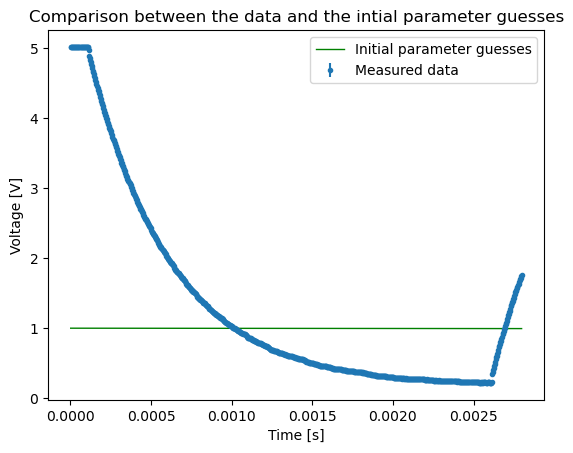

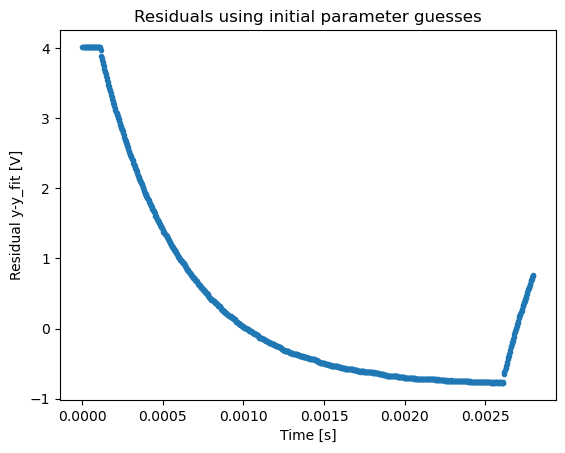

Chi-squared =  811560.0646648349

Fit parameters:
   amplitude = -6.161e+04 ± 3.821e+03
   tau = -4.654e+01 ± 2.887e+00
   voffset = 6.161e+04 ± 3.821e+03




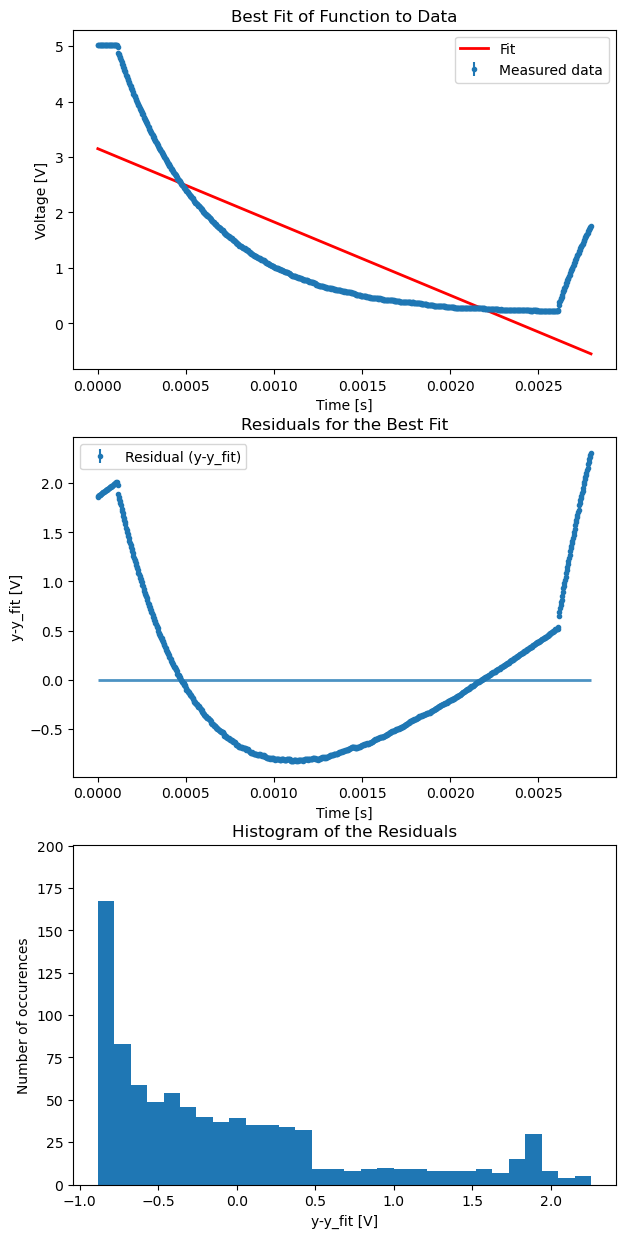

In [22]:
# Load python packages
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

###############################################################################
# DEFINED FITTING FUNCTIONS
###############################################################################

def sine_func(x, amplitude, freq, phase):
    return amplitude * np.sin(2.0 * np.pi * freq * x + phase)

def offset_sine_func(x, amplitude, freq, phase, offset):
    return (amplitude * np.sin(2.0 * np.pi * freq * x + phase)) + offset

def exponential_func(x, amplitude, tau, voffset):
    return amplitude * np.exp(x/(-1.0*tau)) + voffset

###############################################################################
# LIST OF ALL INPUTS
###############################################################################

# Name of the data file
fname = "RCdecayVC2_packed.csv"

# Names and units of data columns from fname
x_name = "Time"
x_units = "s"
y_name = "Voltage"
y_units = "V"

# Modify to change the fitting function, parameter names and to set initial parameter guesses
fit_function = exponential_func
param_names = ("amplitude", "tau", "voffset")
guesses = (1.0, 0.5, 0.0)

# Flags for optional features
show_covariance_matrix = False
set_xy_boundaries = False
lower_x = -0.01 # these values ignored if set_xy_boundaries = False
upper_x = 0.01
lower_y = -1
upper_y = 1

###############################################################################
# LOAD DATA
###############################################################################

# load the file fname and skip the first 'skiprows' rows
data = np.loadtxt(fname, delimiter=",", comments="#", usecols=(0, 1, 2, 3), skiprows=2)

# Assign the data file columns to variables for later use
x = data[:, 0]
y = data[:, 2]
y_sigma = data[:, 3]

###############################################################################
# INITIAL PLOT OF THE DATA
###############################################################################

# Define 500 points spanning the range of the x-data; for plotting smooth curves
xtheory = np.linspace(min(x), max(x), 500)

# Compare the guessed curve to the data for visual reference
y_guess = fit_function(xtheory, *guesses)
plt.errorbar(x, y, yerr=y_sigma, marker=".", linestyle="", label="Measured data")
plt.plot(
    xtheory,
    y_guess,
    marker="",
    linestyle="-",
    linewidth=1,
    color="g",
    label="Initial parameter guesses",
)
plt.xlabel(f"{x_name} [{x_units}]")
plt.ylabel(f"{y_name} [{y_units}]")
plt.title(r"Comparison between the data and the intial parameter guesses")
plt.legend(loc="best", numpoints=1)
plt.show()

# calculate the value of the model at each of the x-values of the data set
y_fit = fit_function(x, *guesses)

# Residuals are the difference between the data and theory
residual = y - y_fit

# Plot the residuals
plt.errorbar(x, residual, yerr=y_sigma, marker=".", linestyle="", label="residuals")
plt.xlabel(f"{x_name} [{x_units}]")
plt.ylabel(f"Residual y-y_fit [{y_units}]")
plt.title("Residuals using initial parameter guesses")
plt.show()

###############################################################################
# PERFORM THE FIT AND PRINT RESULTS
###############################################################################

# Use curve_fit to perform the fit
# fit_function: defined above to choose a specific fitting function 
# fit_params: holds the resulting fit parameters
# fit_cov: the covariance matrix between all the parameters
#          (used to extract fitting parameter uncertanties)
# maxfev=10**5: maximum number of fitting procedure iterations before giving up
# absolute_sigma=True: uncertainties are treated as absolute (not relative)
fit_params, fit_cov = curve_fit(
    fit_function, x, y, sigma=y_sigma, 
    p0=guesses,absolute_sigma=True, maxfev=10**5)

# Define the function that calculates chi-squared
def chi_square(fit_parameters, x, y, sigma):
    dof = len(x) - len(fit_params)
    return np.sum((y - fit_function(x, *fit_parameters)) ** 2 / sigma**2)/dof

# Calculate and print reduced chi-squared
chi2 = chi_square(fit_params, x, y, y_sigma)
print("Chi-squared = ", chi2)

# Calculate the uncertainties in the fit parameters
fit_params_error = np.sqrt(np.diag(fit_cov))

# Print the fit parameters with uncertianties
print("\nFit parameters:")
for i in range(len(fit_params)):
    print(f"   {param_names[i]} = {fit_params[i]:.3e} ± {fit_params_error[i]:.3e}")
print("\n")

# (Optional) Print the covariance between all variables
if show_covariance_matrix:
    print("Covariance between fit parameters:")
    for i, fit_covariance in enumerate(fit_cov):
        for j in range(i+1,len(fit_covariance)):
            print(f"   {param_names[i]} and {param_names[j]}: {fit_cov[i,j]:.3e}")
    print("\n")

# residual is the difference between the data and model
x_fitfunc = np.linspace(min(x), max(x), len(x))
y_fitfunc = fit_function(x_fitfunc, *fit_params)
y_fit = fit_function(x, *fit_params)
residual = y-y_fit

###############################################################################
# PRODUCE A MULTIPANEL PLOT, WITH SCATTER PLOT, RESIDUALS AND RESIDUALS HISTOGRAM
###############################################################################

# The size of the canvas
fig = plt.figure(figsize=(7,15))

# The scatter plot
ax1 = fig.add_subplot(311)
ax1.errorbar(x,y,yerr=y_sigma,marker='.',linestyle='',label="Measured data")
ax1.plot(x_fitfunc, y_fitfunc, marker="", linestyle="-", linewidth=2,color="r", label="Fit")
ax1.set_xlabel(f"{x_name} [{x_units}]")
ax1.set_ylabel(f"{y_name} [{y_units}]")
ax1.set_title('Best Fit of Function to Data')

# (Optional) set the x and y boundaries of your plot
if set_xy_boundaries:
    plt.xlim(lower_x,upper_x)
    plt.ylim(lower_y,upper_y)
# Show the legend. loc='best' places it where the date are least obstructed
ax1.legend(loc='best',numpoints=1)

# The residuals plot
ax2 = fig.add_subplot(312)
ax2.errorbar(x, residual, yerr=y_sigma,marker='.', linestyle='', label="Residual (y-y_fit)")
ax2.hlines(0,np.min(x),np.max(x),lw=2,alpha=0.8)
ax2.set_xlabel(f"{x_name} [{x_units}]")
ax2.set_ylabel(f"y-y_fit [{y_units}]")
ax2.set_title('Residuals for the Best Fit')
ax2.legend(loc='best',numpoints=1)

# Histogram of the residuals
ax3 = fig.add_subplot(313)
hist,bins = np.histogram(residual,bins=30)
ax3.bar(bins[:-1],hist,width=bins[1]-bins[0])
ax3.set_ylim(0,1.2*np.max(hist))
ax3.set_xlabel(f"y-y_fit [{y_units}]")
ax3.set_ylabel('Number of occurences')
ax3.set_title('Histogram of the Residuals')

# Save a copy of the figure as a png 
plt.savefig('FittingResults.png')

# Show the plot
plt.show()

You should comment on the quality of the fit and record the best fit parameters and their uncertainty.

Make a rough comparison of the decay time with the expectation for an RC circuit (we will do a more quantitative comparison later).

## Measurements with Different Values of the Resistance

You can repeat this whole process with each decay curve that you have collected, and it gets easy to just run the codes on some new data.

You can copy and paste the code cells to run on additional data (don't overwrite your previous results!). You can also start storing the outputs as new variables to make it easier to compile your results and discuss them at the end.

If you would prefer, you can run the codes above with new data, or run them in a separate note book. Then record the results here, including the chi-squared values and best fit parameters with uncertainty. If you want to run the code in a separate notebook, just copy the code cells into a new notebook, or adapt the stand-alone codes that we have provided to you. Either way, you should record all fitting results in this main Expt 02 Jupyter notebook, and also include the figures for each fit. The figures can be read in and displayed using the short code below (just make sure you save each image separately with different filenames or it will be overwritten!).

For each additional resistance value, create a new header. This will make it easier for you to navigate your workbook and for the TAs to mark your work later.

In [3]:
# import image module
from IPython.display import Image
  
# get the image
Image(url="FittingResults.jpeg")